In [1]:
import sys
sys.path.append('..')

In [2]:
import json
import polars as pl

import evaluation as ev

pl.config.Config.set_tbl_rows(100)

polars.config.Config

In [3]:
# results_path = '/media/adeshkadambi/WD_BLACK/PhD/adl_recognition/results/batch_20241111_003353/results.json'
results_path = '/media/adeshkadambi/WD_BLACK/PhD/adl_recognition/results/batch_20241118_011946/results.json'

with open(results_path, 'r') as f:
    results = json.load(f)

In [4]:
data = []
for file_path, result in results.items():
    true_label = ev.get_true_label(file_path)
    pred_label = result["prediction"]
    data.append({"true_label": true_label, "pred_label": pred_label})

# Create Polars DataFrame
df = pl.DataFrame(data)

In [5]:
df['pred_label'].value_counts()

pred_label,count
str,u32
"""FUNCTIONAL MOBILITY""",120
"""MEAL PREPARATION AND CLEANUP""",829
"""COMMUNICATION MANAGEMENT""",138
"""LEISURE""",646
"""HOME MANAGEMENT""",266
"""FEEDING""",159
"""GROOMING AND HEALTH MANAGEMENT""",103


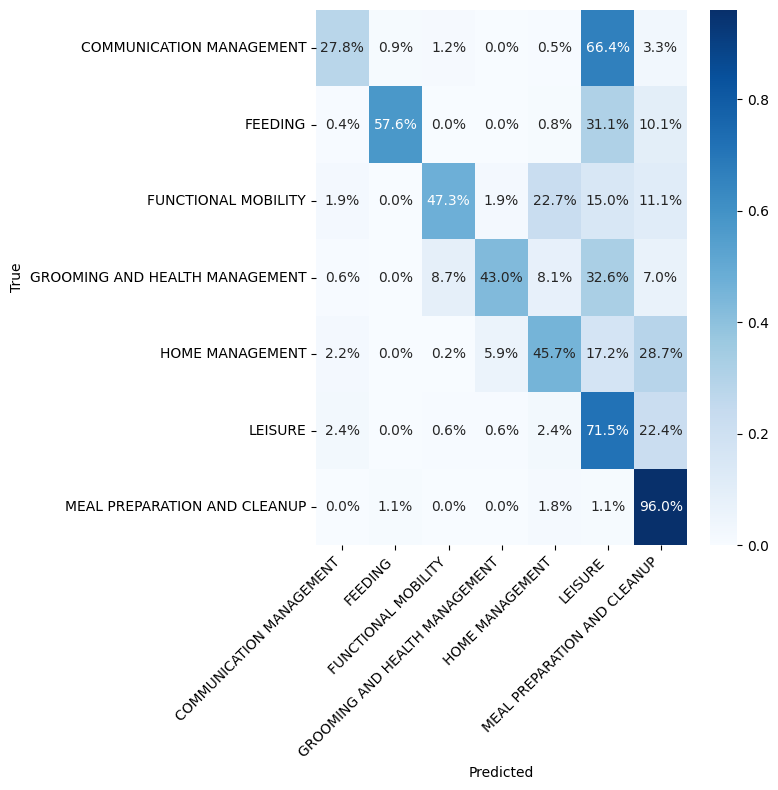

In [6]:
evaluation = ev.evaluate_adl_classifications(results_dict=results)

In [7]:
evaluation['additional_metrics']

{'Balanced Accuracy': np.float64(0.5556756216490318),
 'Macro Avg F1': 0.5596947513864601,
 'Weighted Avg F1': 0.5596947513864602}

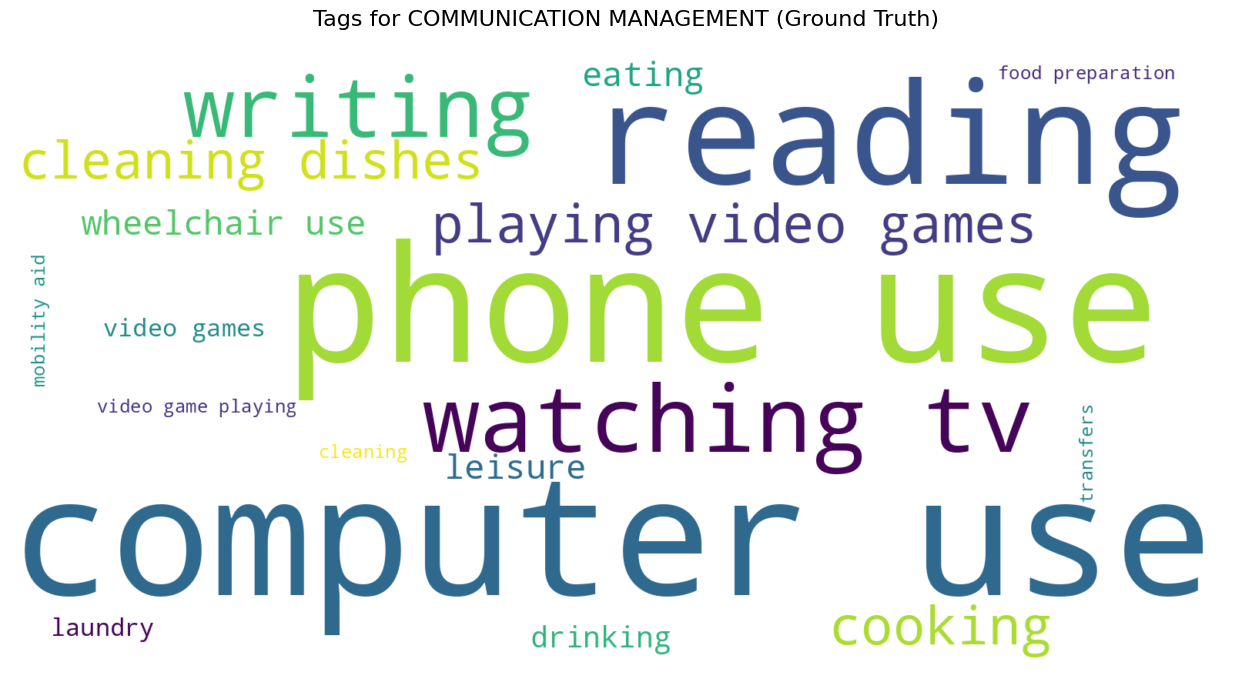

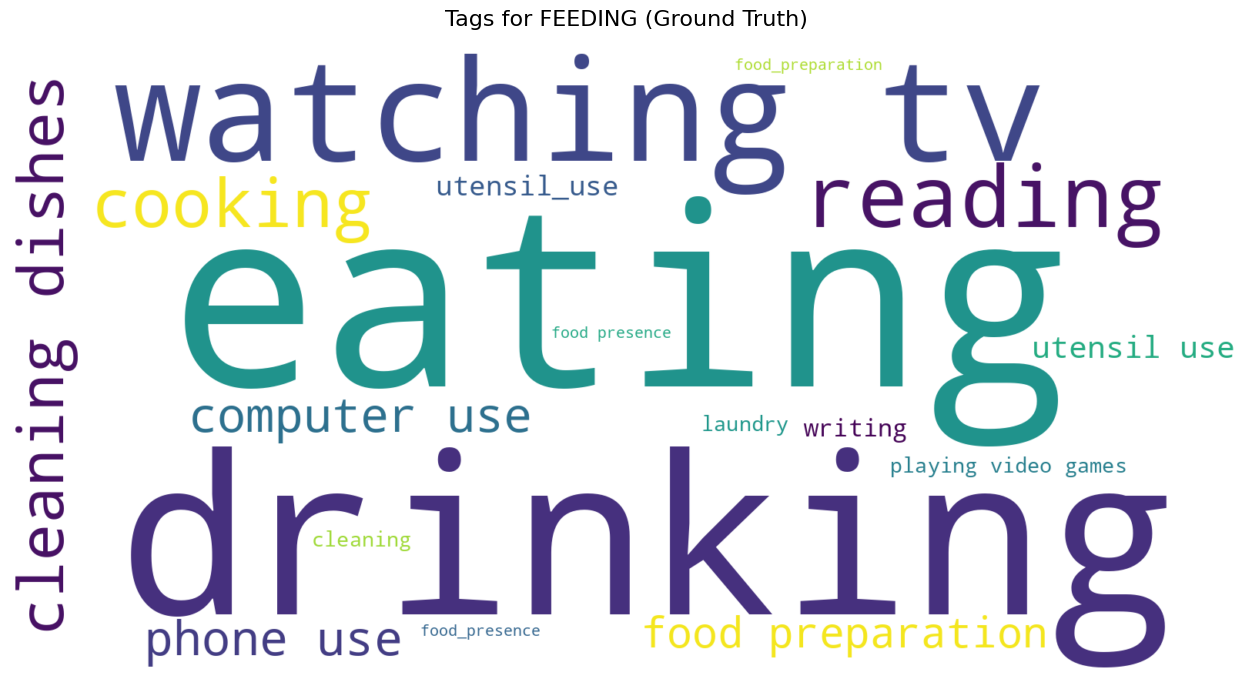

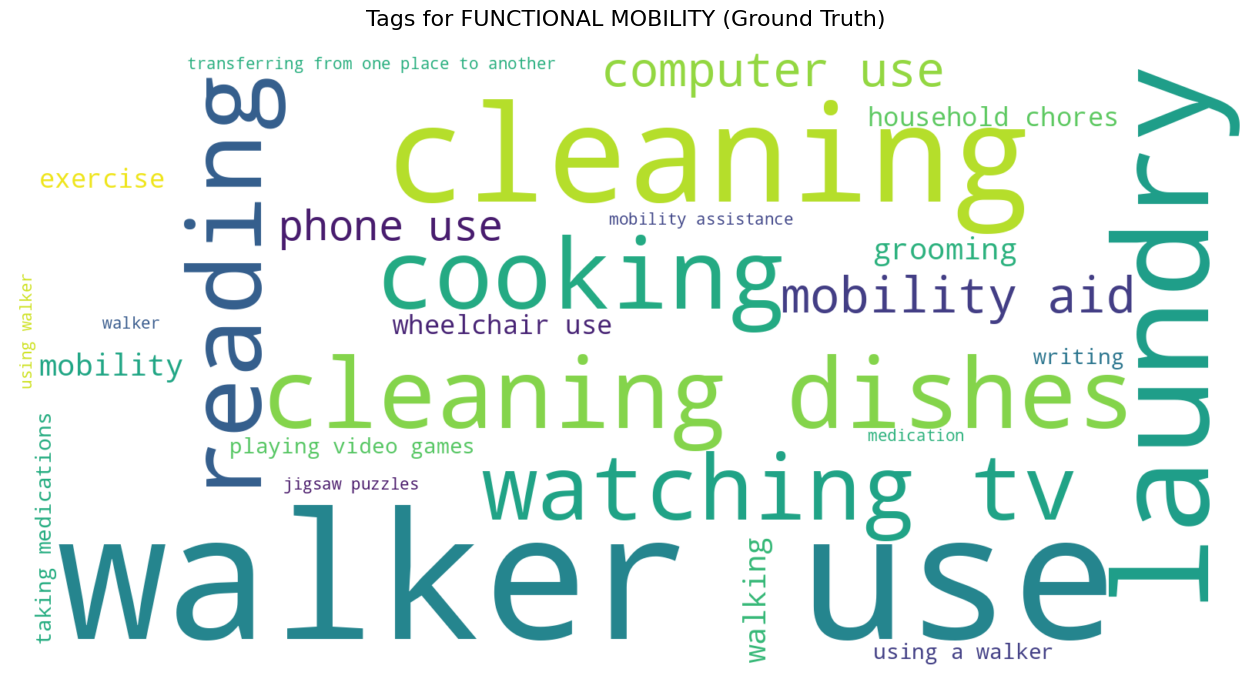

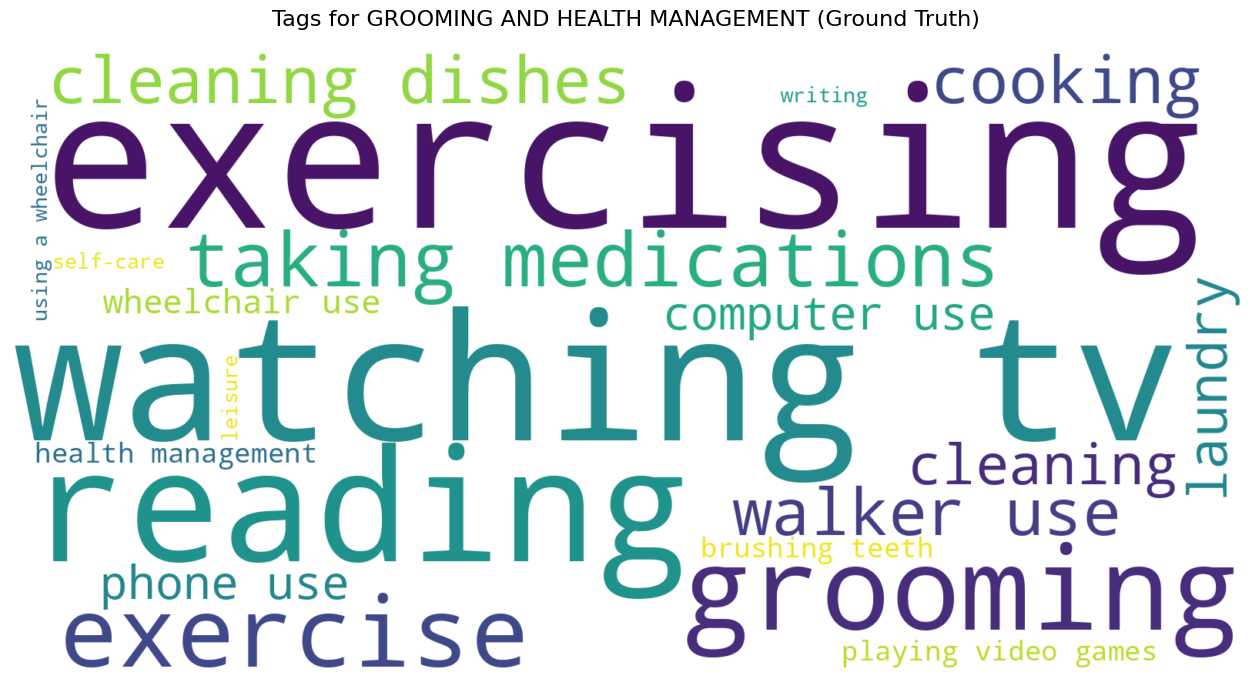

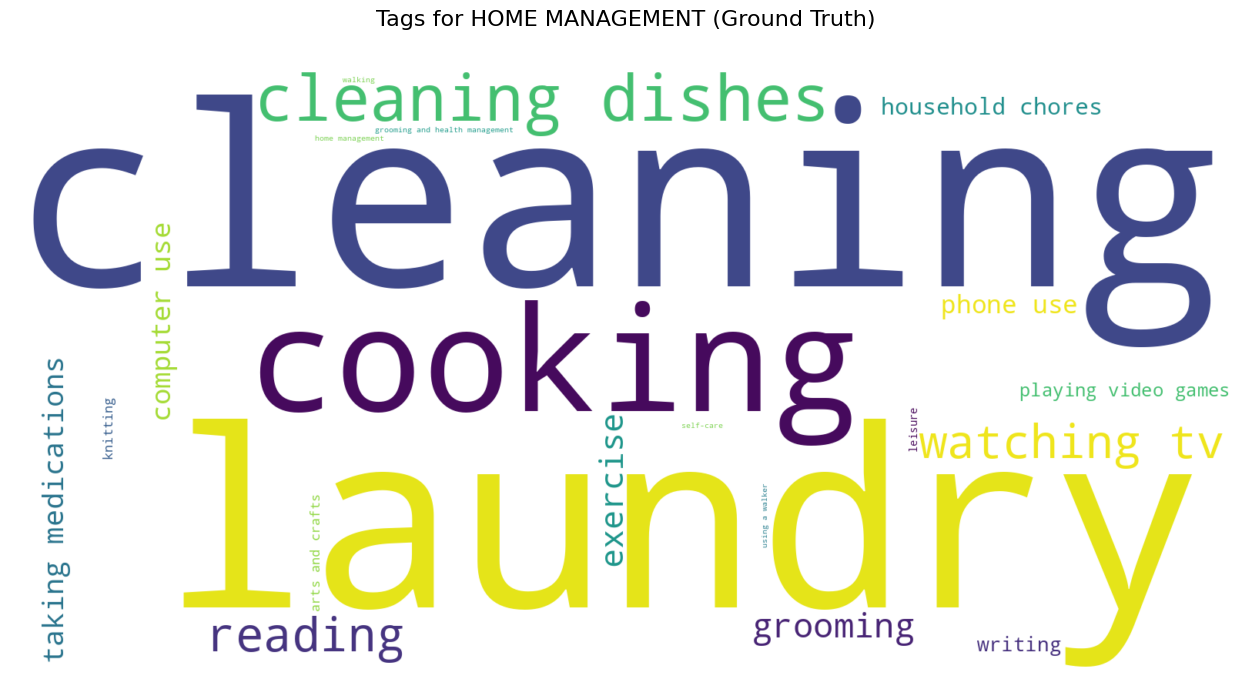

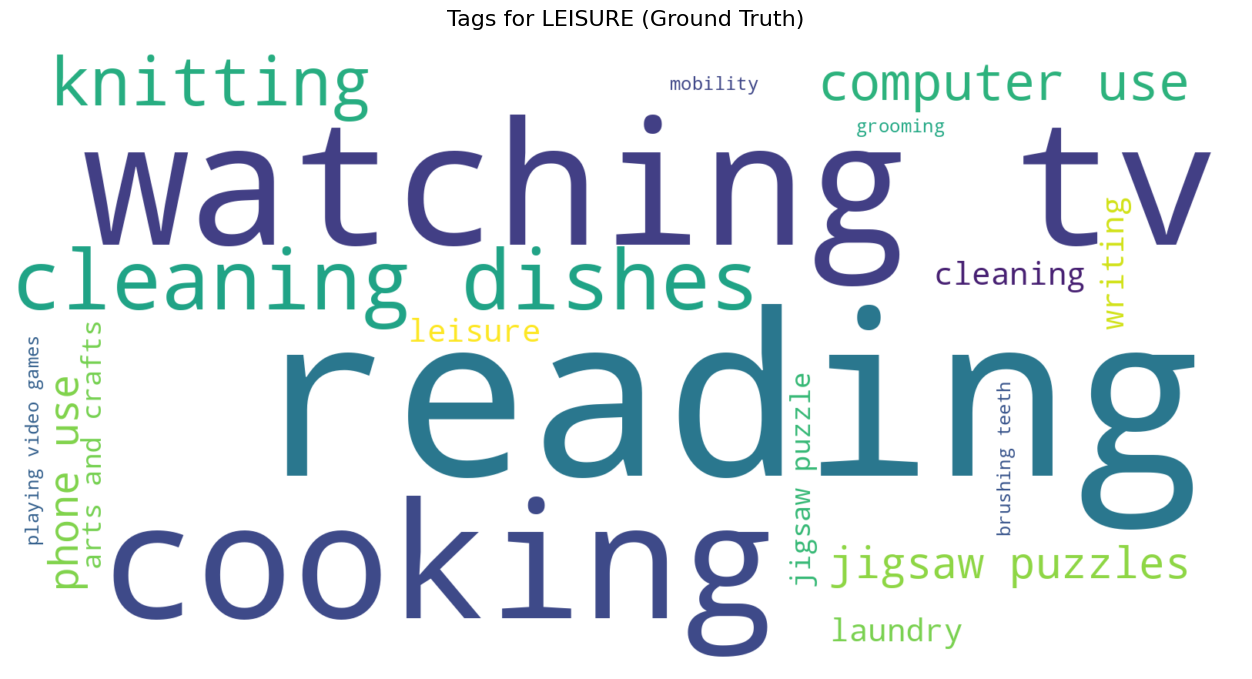

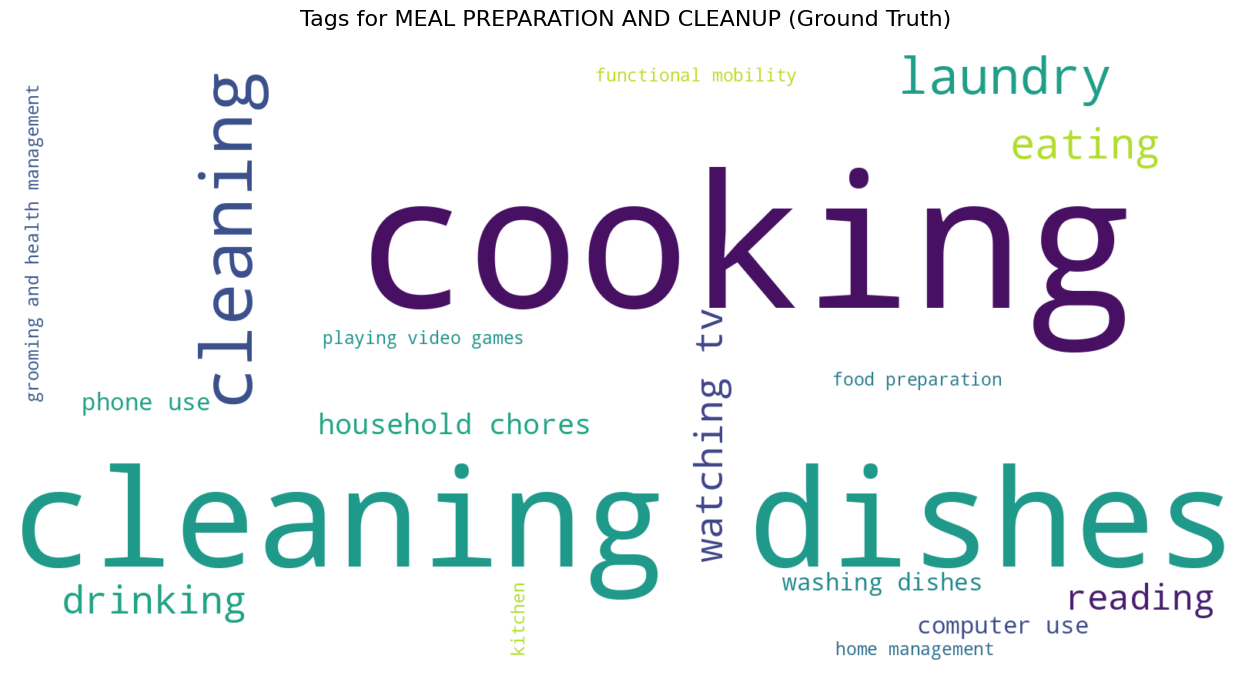

In [9]:
analysis_results_gt = ev.analyze_tags(results)

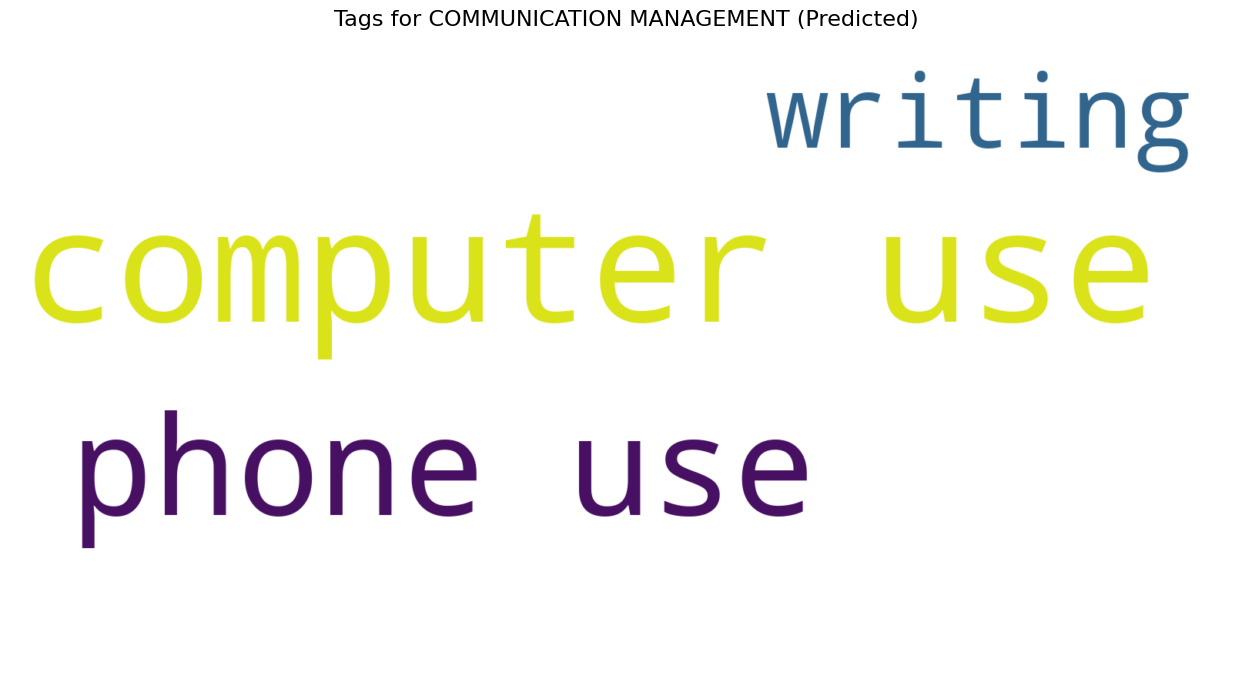

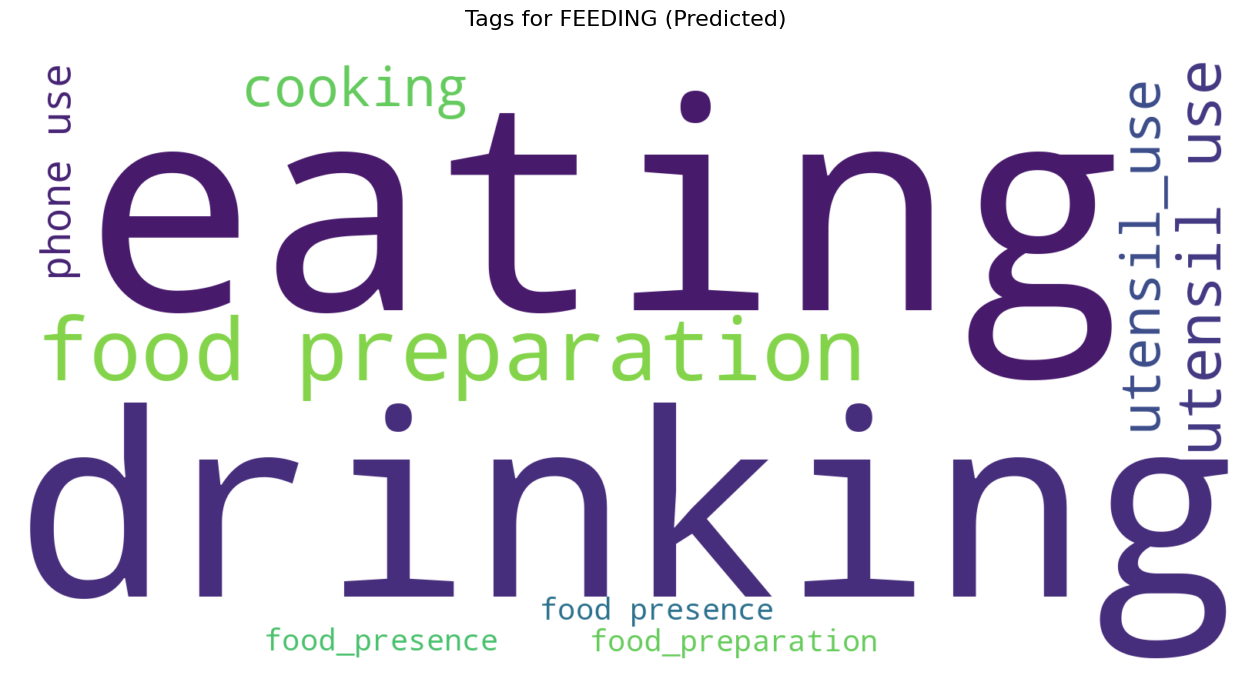

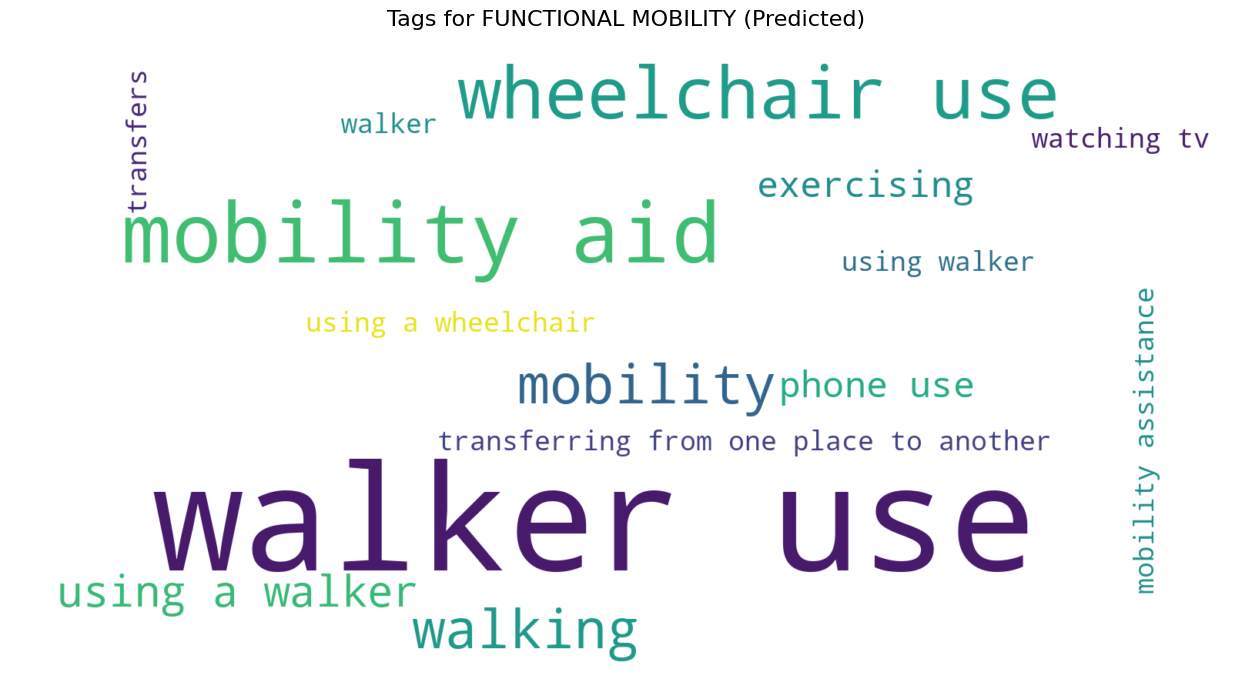

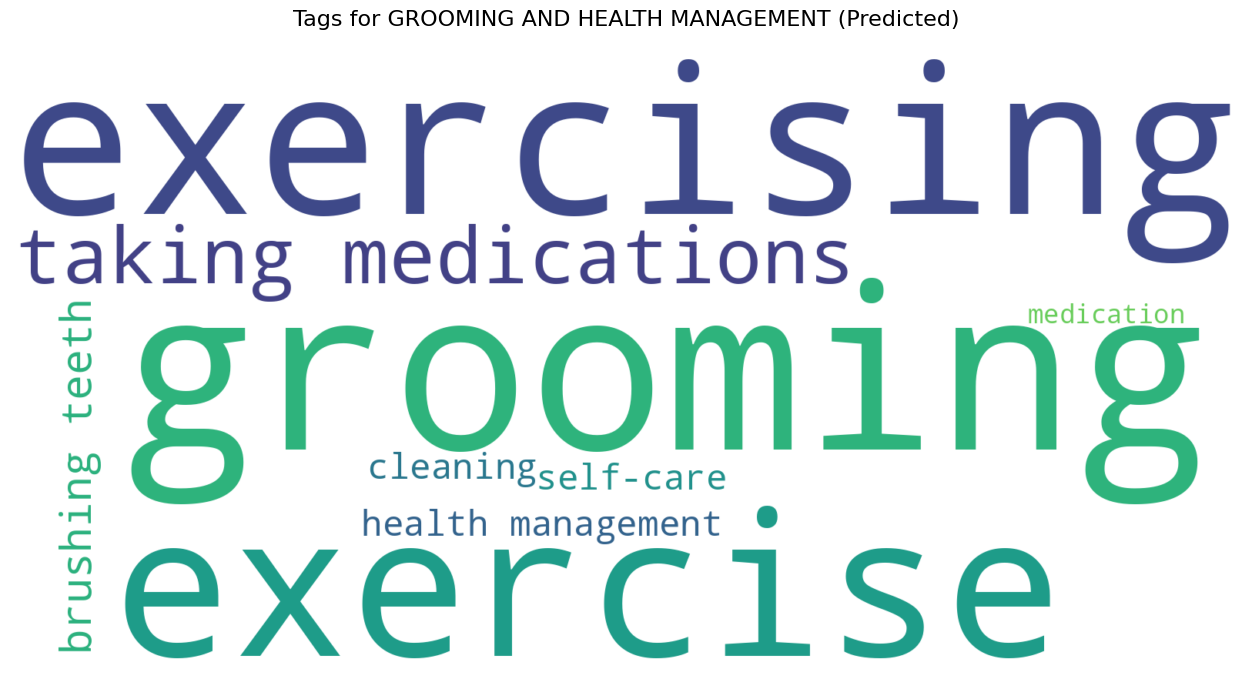

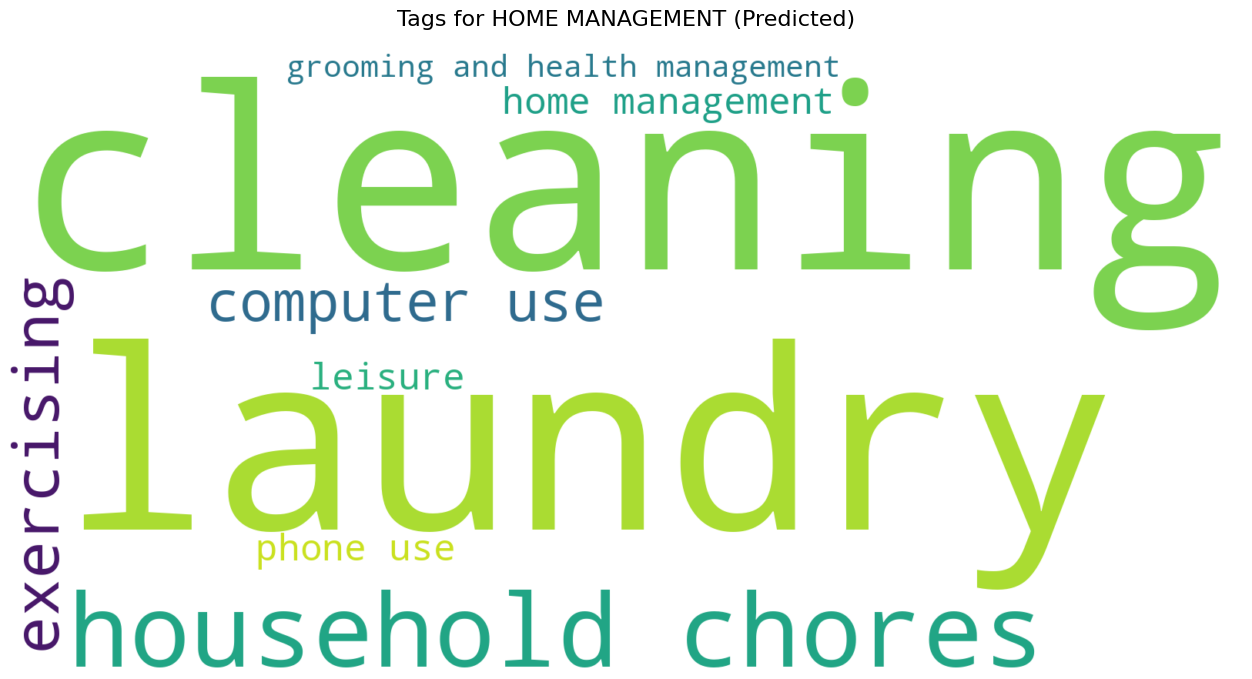

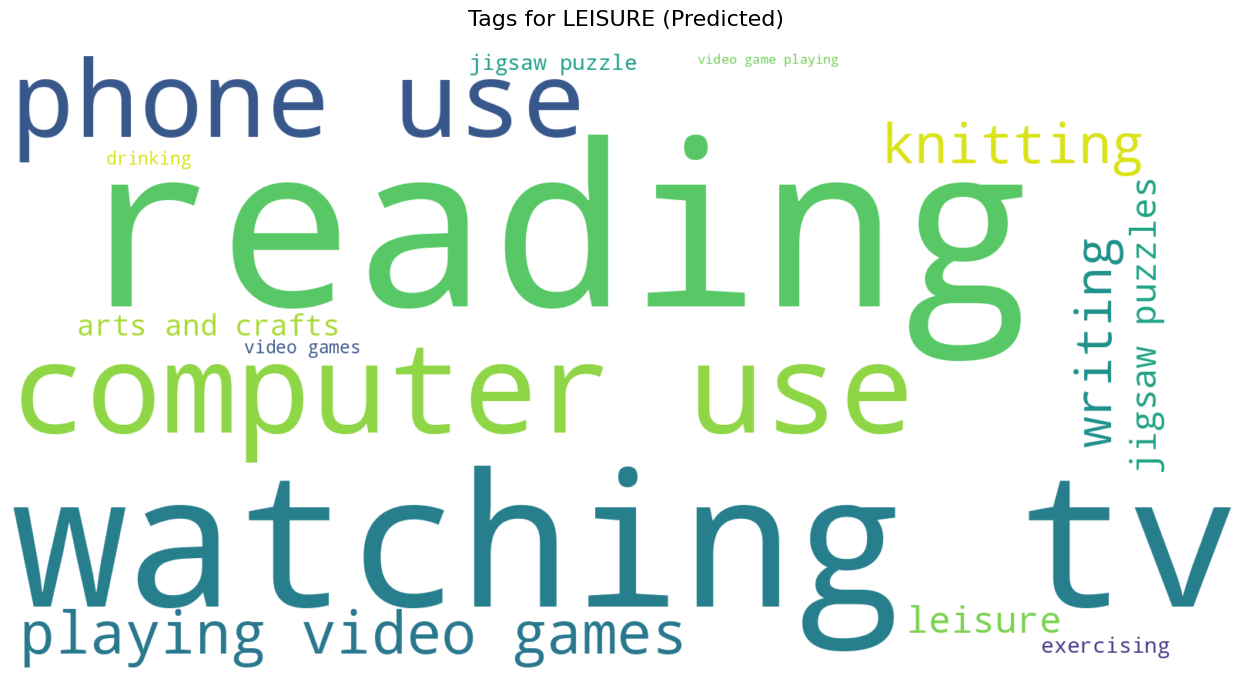

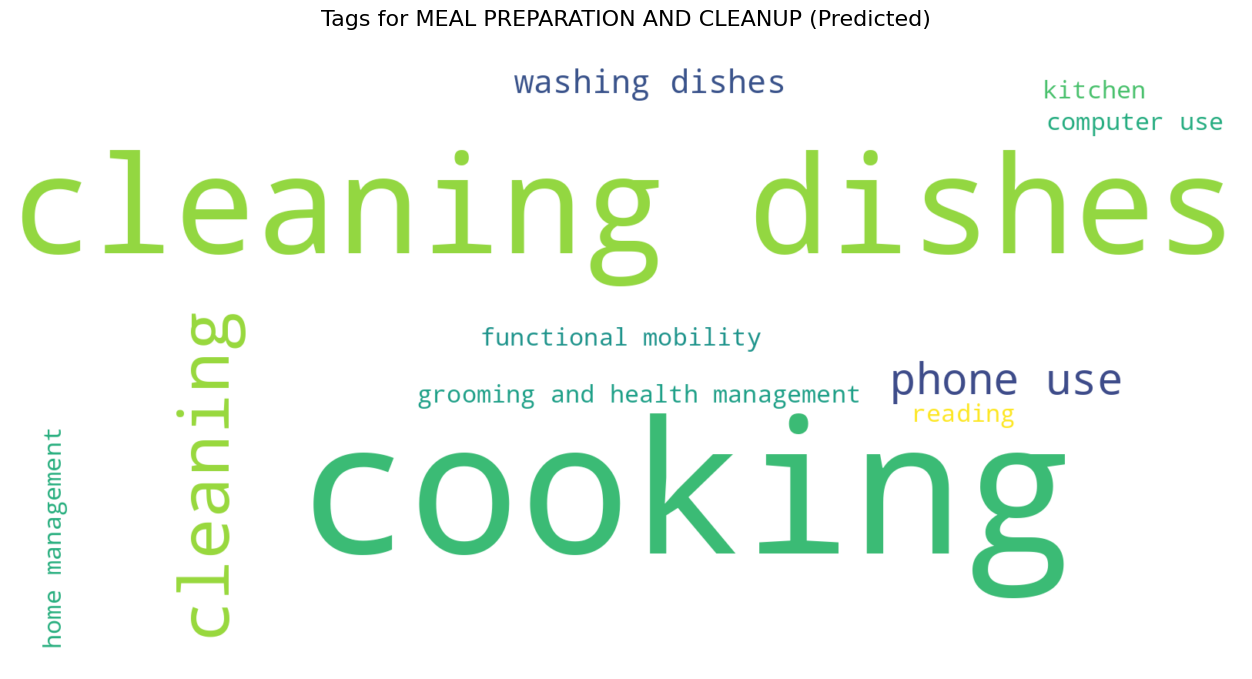

In [10]:
analysis_results_pred = ev.analyze_tags(results,use_ground_truth=False)

In [11]:
summary = ev.analyze_predictions(results)

In [12]:
# Print summary
print("\nPrediction Analysis Summary:")
for label, stats in summary.items():
    print(f"\n{label}:")
    print(f"Total samples: {stats['total_samples']}")
    print(f"Accuracy: {stats['accuracy']}%")
    if stats['misclassifications']:
        print("Misclassified as:")
        for wrong_label, count in stats['misclassifications'].items():
            print(f"  {wrong_label}: {count} times")


Prediction Analysis Summary:

COMMUNICATION MANAGEMENT:
Total samples: 428
Accuracy: 27.8%
Misclassified as:
  LEISURE: 284 times
  MEAL PREPARATION AND CLEANUP: 14 times
  FUNCTIONAL MOBILITY: 5 times
  FEEDING: 4 times
  HOME MANAGEMENT: 2 times

FUNCTIONAL MOBILITY:
Total samples: 207
Accuracy: 47.34%
Misclassified as:
  HOME MANAGEMENT: 47 times
  LEISURE: 31 times
  MEAL PREPARATION AND CLEANUP: 23 times
  COMMUNICATION MANAGEMENT: 4 times
  GROOMING AND HEALTH MANAGEMENT: 4 times

GROOMING AND HEALTH MANAGEMENT:
Total samples: 172
Accuracy: 43.02%
Misclassified as:
  LEISURE: 56 times
  FUNCTIONAL MOBILITY: 15 times
  HOME MANAGEMENT: 14 times
  MEAL PREPARATION AND CLEANUP: 12 times
  COMMUNICATION MANAGEMENT: 1 times

HOME MANAGEMENT:
Total samples: 407
Accuracy: 45.7%
Misclassified as:
  MEAL PREPARATION AND CLEANUP: 117 times
  LEISURE: 70 times
  GROOMING AND HEALTH MANAGEMENT: 24 times
  COMMUNICATION MANAGEMENT: 9 times
  FUNCTIONAL MOBILITY: 1 times

LEISURE:
Total sampl

In [13]:
results = ev.calculate_alignment_rate('/media/adeshkadambi/WD_BLACK/PhD/adl_recognition/results/batch_20241118_011946/alignment.json')

# Print results
print(f"Alignment Rate: {results['alignment_rate']:.1f}%")
print(f"Mean Score: {results['mean_score']:.2f}")
print(f"Median Score: {results['median_score']:.1f}")
print("\nScore Distribution:")
for score, count in results['score_distribution'].items():
    print(f"Score {score}: {count} samples")
print(f"\nTotal Samples: {results['n_samples']}")

Alignment Rate: 72.0%
Mean Score: 3.87
Median Score: 5.0

Score Distribution:
Score 1: 36 samples
Score 2: 6 samples
Score 3: 7 samples
Score 4: 21 samples
Score 5: 105 samples

Total Samples: 175


In [14]:
batch_path = '/media/adeshkadambi/WD_BLACK/PhD/adl_recognition/results/batch_20241118_011946'
ev.display_prediction_analysis(batch_path, results, key="communication-management/SCI11-15--4.MP4")

Key 'communication-management/SCI11-15--4.MP4' not found in results dictionary.


In [15]:
ev.display_prediction_analysis(batch_path, results, key="grooming-health-management/SCI13-1--1.MP4")

Key 'grooming-health-management/SCI13-1--1.MP4' not found in results dictionary.


In [16]:
ev.display_prediction_analysis(batch_path, results, key="home-management/SCI16-2--4.MP4")

Key 'home-management/SCI16-2--4.MP4' not found in results dictionary.
